<a href="https://colab.research.google.com/github/nithin-reddy45/ML-Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Loading

 🧠 Customer Churn Prediction – Project Overview

This Jupyter Notebook is focused on building a machine learning model to **predict customer churn** in a telecom company. Churn indicates whether a customer has left the service (`Churn = Yes`) or remained (`Churn = No`).

---

 🎯 Objective
To develop a predictive model that identifies customers who are likely to churn, allowing the company to take preventive actions to retain them.

---

 📊 Dataset Summary

The dataset includes the following types of information:

- **Customer Demographics**
  - `customerID`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`

- **Service Information**
  - `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `StreamingTV`, `StreamingMovies`, etc.

- **Account & Contract Details**
  - `tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`

- **Target Column**
  - `Churn` (Yes/No)

---

 🔍 Notebook Workflow

1. **Data Loading & Inspection**
   - Read the dataset and understand its structure.

2. **Data Cleaning**
   - Handle missing values and fix data types.

3. **Exploratory Data Analysis (EDA)**
   - Visualize churn patterns using graphs and plots.

4. **Feature Engineering**
   - Encode categorical variables, scale numerical features.

5. **Model Building**
   - Train models like Nueral Networks etc.

6. **Model Evaluation**
   - Use metrics such as R2score Mean Squared Error

---

 🧪 Libraries & Tools Used

- **Pandas**, **NumPy** – Data manipulation
- **Matplotlib**, **Seaborn** – Data visualization
- **Scikit-learn** – ML models, preprocessing, evaluation
- **Tensorflow** / **Keras** – Nueral Network development

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
data.drop("customerID" , axis = 1 , inplace = True)

In [59]:
types = data.dtypes
Null = data.isnull().sum()
ratio = Null / data.shape[0]
n_uniques = data.nunique()

In [60]:
info = pd.DataFrame({"types" : types , "Null" : Null , "Ratio" : ratio , "n_uniques" : n_uniques})
info

,types,Null,Ratio,n_uniques
gender,object,0,0.0,2
SeniorCitizen,int64,0,0.0,2
Partner,object,0,0.0,2
Dependents,object,0,0.0,2
tenure,int64,0,0.0,73
PhoneService,object,0,0.0,2
MultipleLines,object,0,0.0,3
InternetService,object,0,0.0,3
OnlineSecurity,object,0,0.0,3
OnlineBackup,object,0,0.0,3


In [96]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,7021.0,0.504344,0.500017,0.00,0.00,1.0,1.0,1.00
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.0,0.0,1.00
Partner,7021.0,0.484546,0.499797,0.00,0.00,0.0,1.0,1.00
Dependents,7021.0,0.300527,0.458520,0.00,0.00,0.0,1.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.0,55.0,72.00
PhoneService,7021.0,0.902863,0.296166,0.00,1.00,1.0,1.0,1.00
MultipleLines,7021.0,0.943455,0.948575,0.00,0.00,1.0,2.0,2.00
InternetService,7021.0,0.870816,0.737076,0.00,0.00,1.0,1.0,2.00
OnlineSecurity,7021.0,0.790486,0.860730,0.00,0.00,1.0,2.0,2.00
OnlineBackup,7021.0,0.907278,0.880999,0.00,0.00,1.0,2.0,2.00


In [98]:
data.shape

(7021, 20)

### EDA and Data preprocessing

<Axes: xlabel='Churn', ylabel='Count'>

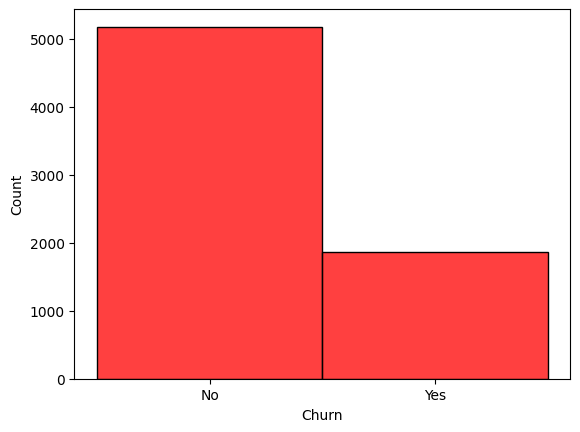

In [61]:
sns.histplot(data['Churn'],color='red')

In [62]:
numerical_columns = data.select_dtypes("number").columns

In [63]:
con_columns = []
for col in numerical_columns:
  if data[col].nunique() > 10:
    con_columns.append(col)
con_columns

['tenure', 'MonthlyCharges']

<Axes: >

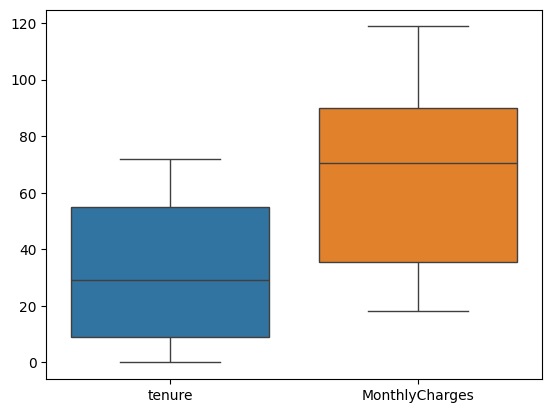

In [64]:
sns.boxplot(data=data[con_columns])

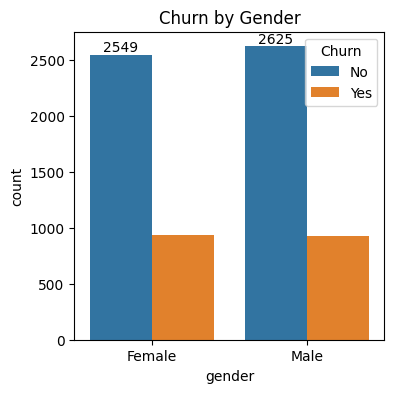

In [65]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x=data["gender"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()

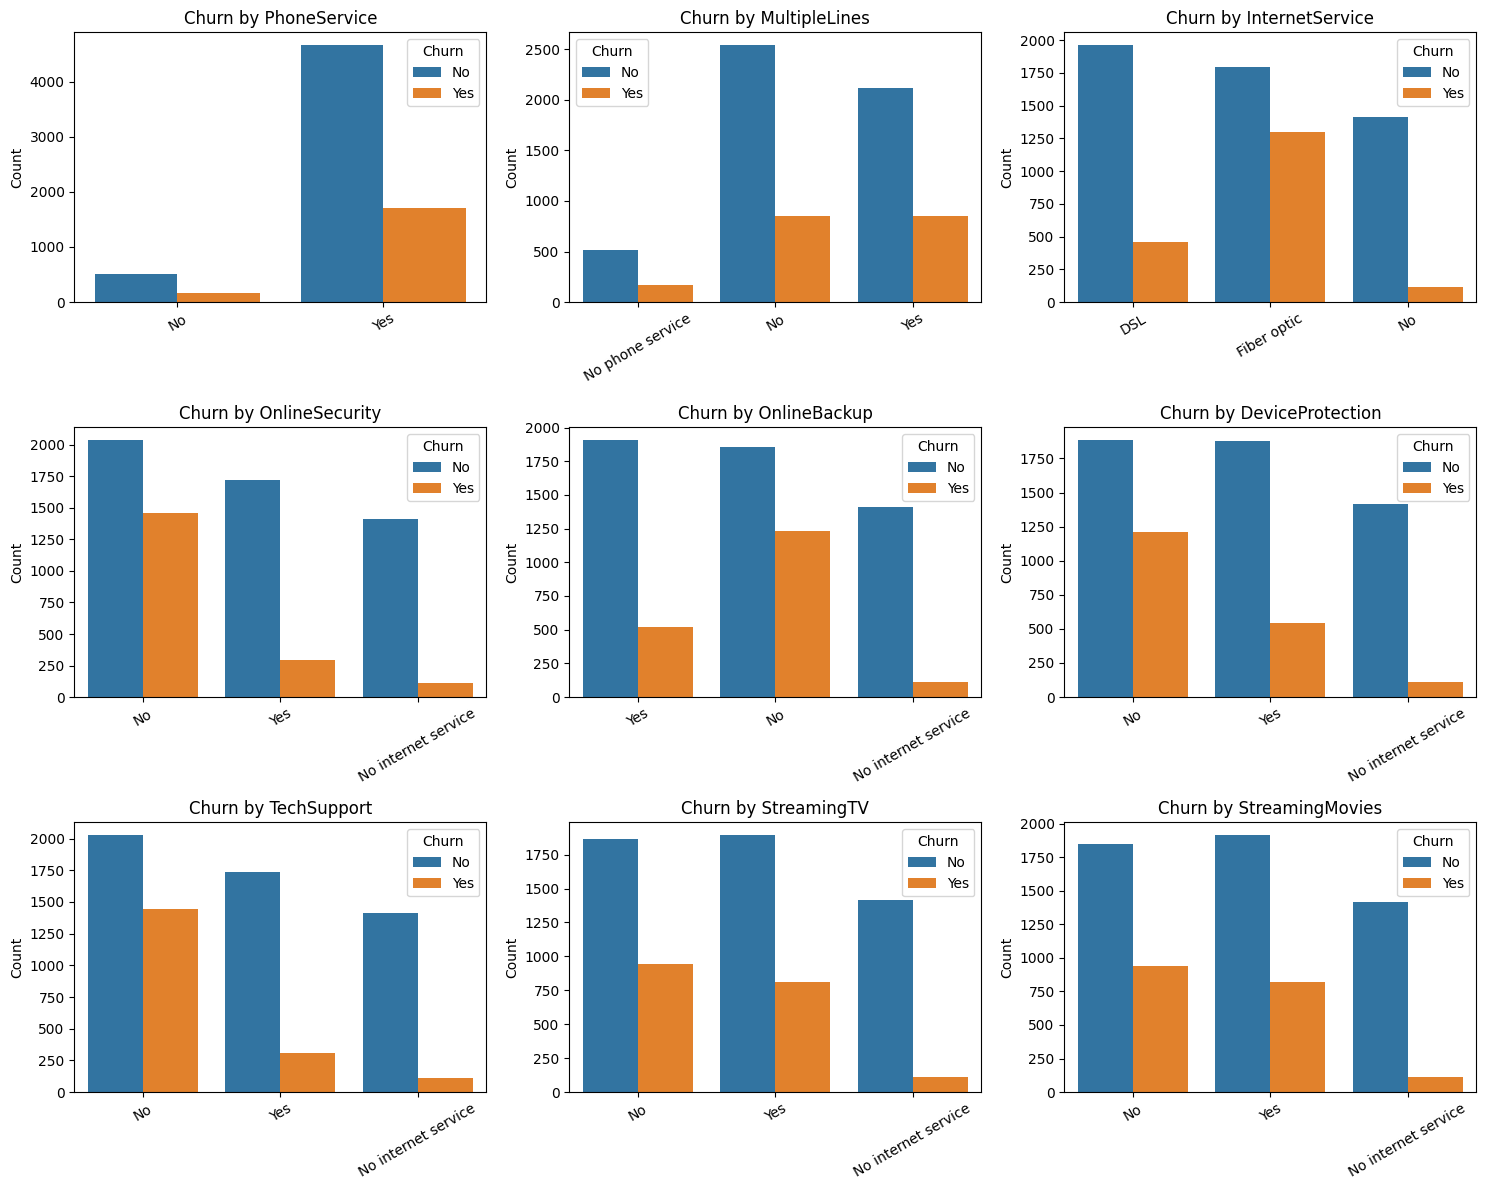

In [66]:
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(features):
    sns.countplot(data=data, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

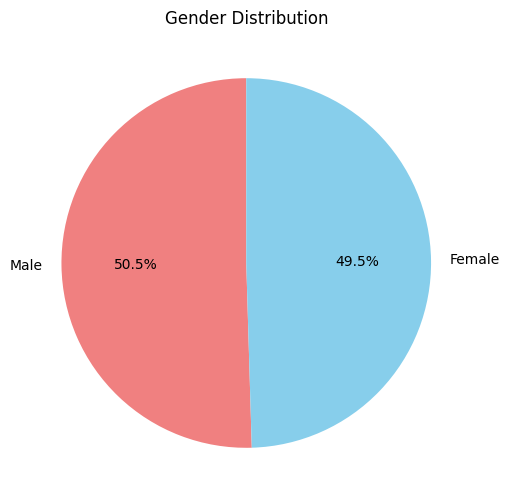

In [67]:
data['gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue'],
    figsize=(6, 6)
)
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

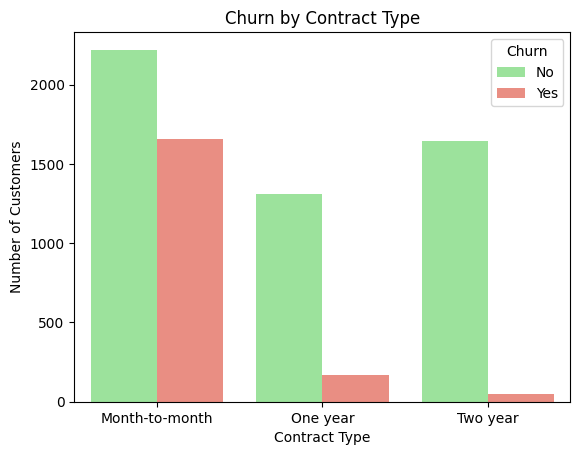

In [68]:
sns.countplot(
    data=data,
    x='Contract',
    hue='Churn',
    palette={'Yes': 'salmon', 'No': 'lightgreen'}
)

plt.title('Churn by Contract Type')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.show()


###Model Development

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [70]:
cat_columns = data.select_dtypes(include = ["object"]).columns
cat_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [71]:
for col in cat_columns:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

In [72]:
data.duplicated().sum()

np.int64(22)

In [73]:
data.drop_duplicates(inplace = True)

In [74]:
X = data.drop("Churn", axis = 1 , inplace = False)
Y = data["Churn"]

In [75]:
orig_columns = X.columns
orig_index = X.index
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_scaled_df = pd.DataFrame(x_scaled , columns = orig_columns , index = orig_index)

In [76]:
X , X_test_inter , Y , Y_test_inter = train_test_split(x_scaled_df , Y , test_size = 0.1 , random_state = 44 , stratify=Y)

In [77]:
Y_test_inter.value_counts()

,count
Churn,
0,517
1,186


In [78]:
Y.value_counts()

,count
Churn,
0,4647
1,1671


In [79]:
sampler = RandomOverSampler()

In [80]:
X_resampler , Y_resampler = sampler.fit_resample(X , Y)

In [81]:
Y_resampler.value_counts()

,count
Churn,
1,4647
0,4647


In [82]:
X_train,X_test , Y_train , Y_test   =  train_test_split(X_resampler , Y_resampler , test_size = 0.2 , random_state = 44 , stratify=Y_resampler)


In [91]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [84]:

input_layer = Input(shape = (X.shape[1] , ))
h_layer1 = Dense(128 , activation = 'relu')(input_layer)
h_layer2 = Dense(64 , activation = 'relu')(h_layer1)
h_layer3 = Dense(32 , activation = 'relu')(h_layer2)
norm = BatchNormalization()(h_layer3)
drop = Dropout(0.2)(norm)
output_layer = Dense(1 , activation = 'sigmoid')(drop)

In [85]:
model = Model(inputs = input_layer , outputs = output_layer)

In [86]:
model.compile('adam' , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [87]:
early_stopping = EarlyStopping(monitor = 'val_accuracy' , patience = 10 , restore_best_weights = True)
history = model.fit(X_train , Y_train , validation_split = 0.2 , batch_size = 32 , epochs = 75 , callbacks = [early_stopping])

Epoch 1/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6883 - loss: 0.5960 - val_accuracy: 0.7290 - val_loss: 0.5737
Epoch 2/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7529 - loss: 0.5092 - val_accuracy: 0.7492 - val_loss: 0.5126
Epoch 3/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7663 - loss: 0.4948 - val_accuracy: 0.7337 - val_loss: 0.5103
Epoch 4/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7693 - loss: 0.4920 - val_accuracy: 0.7626 - val_loss: 0.5320
Epoch 5/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7651 - loss: 0.4901 - val_accuracy: 0.7229 - val_loss: 0.5173
Epoch 6/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7766 - loss: 0.4796 - val_accuracy: 0.7586 - val_loss: 0.4890
Epoch 7/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7819 - loss: 0.4683 - val_accuracy: 0.7485 - val_loss: 0.4985
Epoch 8/75
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7870 - loss: 0.4610 - val_accuracy: 0.

In [88]:
loss  , accuracy = model.evaluate(X_test , Y_test)
print(f"loss for test data is {loss}")
print(f"r2_score for test data is {accuracy}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8190 - loss: 0.6264
loss for test data is 0.5949169993400574
r2_score for test data is 0.826788604259491


In [89]:
y_pred = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


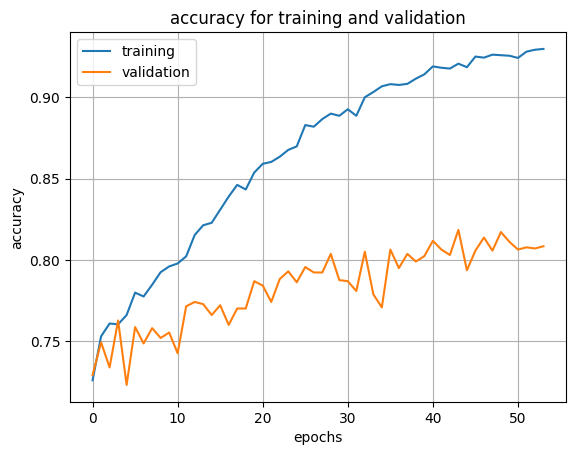

In [94]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy for training and validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["training" , "validation"] , loc = "upper left")
plt.grid()
plt.show()